In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import *


In [73]:
df = spark.read.csv("merged_table.csv")

df = df.withColumnRenamed("_c0", "log_date")
df = df.withColumnRenamed("_c1", "borough")
df = df.withColumnRenamed("_c2", "summon_count")
df = df.withColumnRenamed("_c3", "encampment_count")
df = df.withColumnRenamed("_c4", "temperature")

df = df.withColumn("log_date", to_date(col('log_date'), 'yyyy-MM-dd'))
df = df.withColumn("summon_count",col("summon_count").cast("int"))
df = df.withColumn("encampment_count",col("encampment_count").cast("int"))
df = df.withColumn("temperature",col("temperature").cast("float"))

df = df.withColumn('year',date_format('log_date','yyyy').cast("int"))
df = df.withColumn('month',date_format('log_date','M').cast("int"))

In [287]:
df = df.na.fill(value=0)
df.summary().show()

+-------+-------------+-----------------+-----------------+-----------------+------------------+------------------+
|summary|      borough|     summon_count| encampment_count|      temperature|              year|             month|
+-------+-------------+-----------------+-----------------+-----------------+------------------+------------------+
|  count|         3598|             3598|             3598|             3598|              3598|              3598|
|   mean|         null|38.63062812673708|3.234574763757643|56.13035019455253|2018.4966648137854| 6.496664813785436|
| stddev|         null|32.73895752259849|5.363361192936918| 17.5414506972964|0.5000583723959434|3.4390300942810104|
|    min|        BRONX|                1|                0|              9.0|              2018|                 1|
|    25%|         null|               15|                0|             41.0|              2018|                 4|
|    50%|         null|               31|                1|             

In [75]:
df.show()

+----------+-------------+------------+----------------+-----------+----+-----+
|  log_date|      borough|summon_count|encampment_count|temperature|year|month|
+----------+-------------+------------+----------------+-----------+----+-----+
|2018-01-01|        BRONX|          49|               0|       13.0|2018|    1|
|2018-01-01|     BROOKLYN|          54|               1|       13.0|2018|    1|
|2018-01-01|    MANHATTAN|          18|               0|       13.0|2018|    1|
|2018-01-01|       QUEENS|          21|               1|       13.0|2018|    1|
|2018-01-01|STATEN ISLAND|           1|               0|       13.0|2018|    1|
|2018-01-02|        BRONX|          59|               1|       20.0|2018|    1|
|2018-01-02|     BROOKLYN|          42|               2|       20.0|2018|    1|
|2018-01-02|    MANHATTAN|          44|               1|       20.0|2018|    1|
|2018-01-02|       QUEENS|          26|               0|       20.0|2018|    1|
|2018-01-02|STATEN ISLAND|           4| 

In [76]:
df.columns

['log_date',
 'borough',
 'summon_count',
 'encampment_count',
 'temperature',
 'year',
 'month']

In [77]:
df_sw = df.drop('encampment_count')
df_sw.show()

+----------+-------------+------------+-----------+----+-----+
|  log_date|      borough|summon_count|temperature|year|month|
+----------+-------------+------------+-----------+----+-----+
|2018-01-01|        BRONX|          49|       13.0|2018|    1|
|2018-01-01|     BROOKLYN|          54|       13.0|2018|    1|
|2018-01-01|    MANHATTAN|          18|       13.0|2018|    1|
|2018-01-01|       QUEENS|          21|       13.0|2018|    1|
|2018-01-01|STATEN ISLAND|           1|       13.0|2018|    1|
|2018-01-02|        BRONX|          59|       20.0|2018|    1|
|2018-01-02|     BROOKLYN|          42|       20.0|2018|    1|
|2018-01-02|    MANHATTAN|          44|       20.0|2018|    1|
|2018-01-02|       QUEENS|          26|       20.0|2018|    1|
|2018-01-02|STATEN ISLAND|           4|       20.0|2018|    1|
|2018-01-03|        BRONX|          58|       23.0|2018|    1|
|2018-01-03|     BROOKLYN|          26|       23.0|2018|    1|
|2018-01-03|    MANHATTAN|          44|       23.0|2018

In [78]:
df_sw.filter(df.year == 2018).groupby('month','year').count().sort('count').show()
df_sw.filter(df.year == 2019).groupby('month','year').count().sort('count').show()

+-----+----+-----+
|month|year|count|
+-----+----+-----+
|    2|2018|  139|
|   11|2018|  147|
|    6|2018|  149|
|    4|2018|  150|
|   12|2018|  150|
|    9|2018|  150|
|    3|2018|  153|
|    7|2018|  154|
|   10|2018|  154|
|    1|2018|  155|
|    8|2018|  155|
|    5|2018|  155|
+-----+----+-----+

+-----+----+-----+
|month|year|count|
+-----+----+-----+
|    2|2019|  138|
|   11|2019|  144|
|    9|2019|  145|
|   12|2019|  148|
|    6|2019|  149|
|    4|2019|  149|
|   10|2019|  149|
|    8|2019|  151|
|    3|2019|  153|
|    1|2019|  153|
|    5|2019|  154|
|    7|2019|  154|
+-----+----+-----+



In [79]:
# BROOKLYN's ANALYSIS
df.filter(df.borough == 'BROOKLYN').groupby('month').sum('summon_count').sort(df.month).show()
df.filter(df.borough == 'BROOKLYN').groupby('month').avg('temperature').sort(df.month).show()

+-----+-----------------+
|month|sum(summon_count)|
+-----+-----------------+
|    1|             3228|
|    2|             2689|
|    3|             3585|
|    4|             3699|
|    5|             3084|
|    6|             2933|
|    7|             2885|
|    8|             3842|
|    9|             2350|
|   10|             2154|
|   11|             2261|
|   12|             1653|
+-----+-----------------+

+-----+------------------+
|month|  avg(temperature)|
+-----+------------------+
|    1| 32.33870967741935|
|    2|            39.375|
|    3| 41.12903225806452|
|    4|              52.7|
|    5| 64.79032258064517|
|    6| 71.93333333333334|
|    7|  78.8225806451613|
|    8| 77.06451612903226|
|    9|             70.85|
|   10|59.064516129032256|
|   11| 44.36666666666667|
|   12| 39.45161290322581|
+-----+------------------+



In [121]:
# summont count by borough and month, with average temperature of the month
df0 = df_sw.groupby('borough','month').sum('summon_count')
df1 = df_sw.groupby('borough','month').avg('temperature')
g1 = df0.join(df1,(df1.borough == df0.borough) & (df1.month == df0.month),how='left').drop(df0.month).drop(df0.borough)
g1.sort(col('sum(summon_count)').desc()).show()


+-----------------+---------+-----+------------------+
|sum(summon_count)|  borough|month|  avg(temperature)|
+-----------------+---------+-----+------------------+
|             4580|MANHATTAN|    2|            39.375|
|             4137|MANHATTAN|   10|59.064516129032256|
|             3984|MANHATTAN|    8| 77.06451612903226|
|             3976|MANHATTAN|    4|              52.7|
|             3926|MANHATTAN|    3| 41.12903225806452|
|             3859|MANHATTAN|    5| 64.79032258064517|
|             3842| BROOKLYN|    8| 77.06451612903226|
|             3743|MANHATTAN|   12| 39.45161290322581|
|             3741|MANHATTAN|    7|  78.8225806451613|
|             3699| BROOKLYN|    4|              52.7|
|             3599|MANHATTAN|    1| 32.33870967741935|
|             3587|    BRONX|    5| 64.79032258064517|
|             3585| BROOKLYN|    3| 41.12903225806452|
|             3485|    BRONX|    7|  78.8225806451613|
|             3228| BROOKLYN|    1| 32.33870967741935|
|         

0.0642509534876362

In [212]:
# summon count by average 
df2 = df.groupby('month','year').sum('summon_count')
df3 = df.groupby('month','year').avg('temperature')
g2 = df2.join(df3,(df3.month == df2.month)&(df3.year == df2.year),how='inner').drop(df3.month).drop(df3.year).sort(col('month').asc())
g2.show()

# correlation between summon count and average temperature when grouping by month and year
g2.corr("sum(summon_count)", "avg(temperature)") # 0.24477209065308664


# g2.sort(col('sum(summon_count)').desc()).show()

+-----------------+-----+----+------------------+
|sum(summon_count)|month|year|  avg(temperature)|
+-----------------+-----+----+------------------+
|             5374|    1|2019|32.790849673202615|
|             6327|    1|2018|31.903225806451612|
|             6674|    2|2018|42.201438848920866|
|             5815|    2|2019| 36.52173913043478|
|             6779|    3|2018| 40.38562091503268|
|             6335|    3|2019| 41.90196078431372|
|             5847|    4|2019|55.718120805369125|
|             6692|    4|2018|49.666666666666664|
|             5871|    5|2019| 62.46103896103896|
|             6961|    5|2018| 67.19354838709677|
|             5914|    6|2019| 71.95302013422818|
|             5483|    6|2018| 72.04026845637584|
|             6570|    7|2018| 77.87662337662337|
|             6543|    7|2019|  79.8051948051948|
|             6286|    8|2019| 75.73509933774834|
|             6135|    8|2018|  78.3225806451613|
|             5053|    9|2018|              71.0|


0.24477209065308664

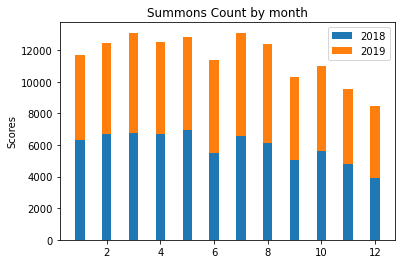

In [221]:
gg2 = g2.toPandas()

labels = np.linspace(1, 12, num=12)
data18 = gg2[gg2['year']==2018]['sum(summon_count)']
data19 = gg2[gg2['year']==2019]['sum(summon_count)']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, data18, width, label='2018')
ax.bar(labels, data19, width, bottom=data18, label='2019')

ax.set_ylabel('Scores')
ax.set_title('Summons Count by month')
ax.legend()

plt.show()

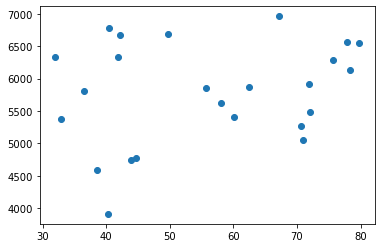

In [232]:
gg3 = df.toPandas()
x = gg2['avg(temperature)']
y = gg2['sum(summon_count)'] 
colors = np.random.rand(N)

plt.scatter(x, y)
plt.show()

In [ ]:
import seaborn as sns
gg3 = df.toPandas()
all_count = gg3['summon_count']
all_tmp = gg3['temperature']
 
# sns.set(style='whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x="summon_count",
                    y="temperature",
                    hue="year",
                    palette = "colorblind",
                    data=gg3)

In [ ]:
import seaborn as sns
# sns.set(style='whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x="summon_count",
                    y="emcampment_count",
                    hue="year",
                    palette = "colorblind",
                    data=gg3)

<AxesSubplot:xlabel='summon_count', ylabel='temperature'>

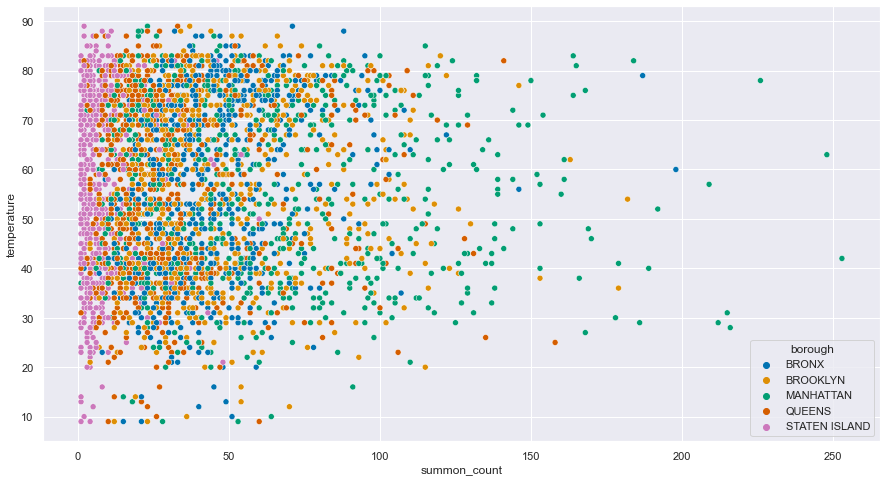

In [258]:
sns.scatterplot(x="summon_count",
                    y="temperature",
                    hue="borough",
                    palette = "colorblind",
                    data=gg3)

In [ ]:
sns.scatterplot(x="summon_count",
                    y="encampment_count",
                    hue="borough",
                    palette = "colorblind",
                    data=gg3)

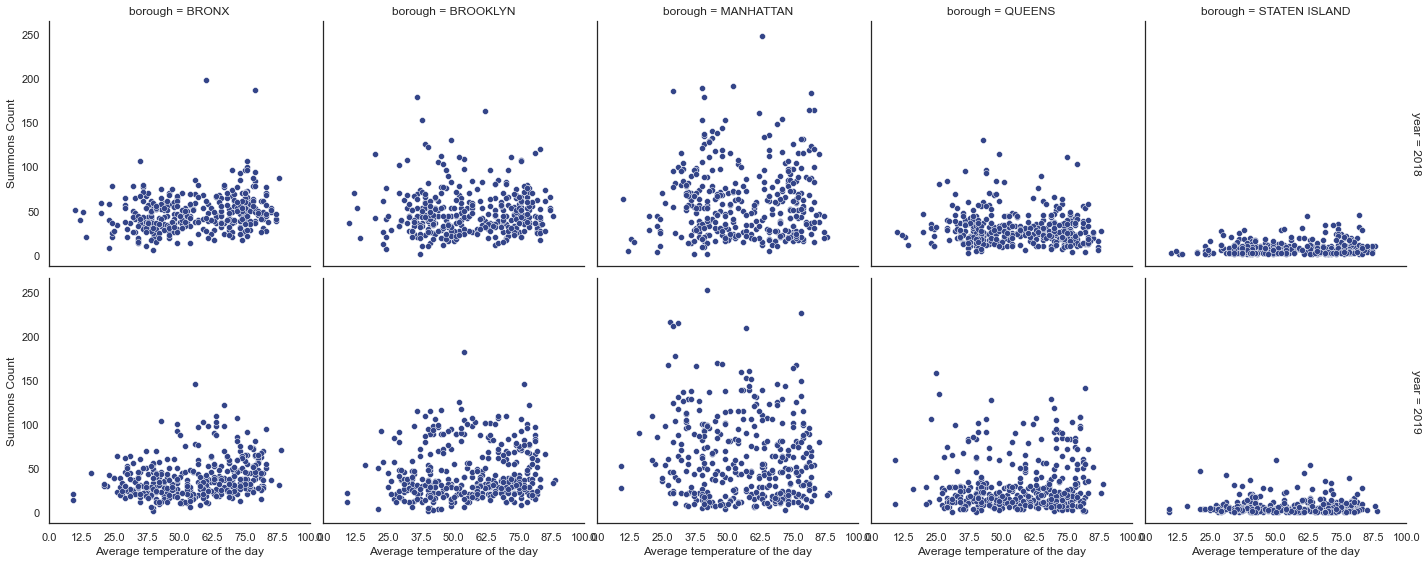

In [283]:
with sns.axes_style("white"):
    scatter = sns.FacetGrid(gg3, row="year", col="borough", margin_titles=True, height=4)
scatter.map(sns.scatterplot, "temperature","summon_count", color="#334488")
scatter.set_axis_labels("Average temperature of the day","Summons Count")
sns.set(rc = {'figure.figsize':(15,8)})
scatter.set(xticks=np.linspace(0,100,9), yticks=[0,50,100,150,200,250])
# scatter.figure.subplots_adjust(wspace=.02, hspace=.02)

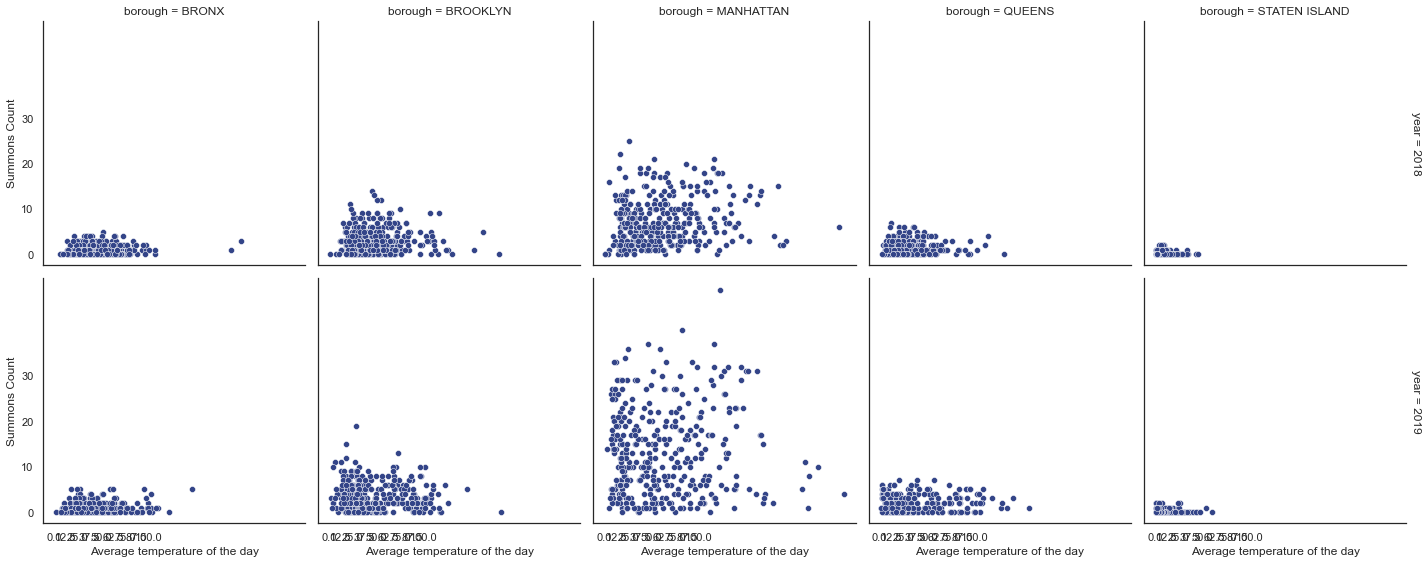

In [293]:
with sns.axes_style("white"):
    scatter = sns.FacetGrid(gg3, row="year", col="borough", margin_titles=True, height=4)
scatter.map(sns.scatterplot, "summon_count","encampment_count", color="#334488")
scatter.set_axis_labels("Average temperature of the day","Summons Count")
sns.set(rc = {'figure.figsize':(15,8)})
scatter.set(xticks=np.linspace(0,100,9)
            , yticks=[0,10,20,30]
           )
# scatter.figure.subplots_adjust(wspace=.02, hspace=.02)

In [284]:
g2.corr("sum(summon_count)", "month") # -0.6772906248080454

-0.6772906248080454

In [134]:
# summon count by average 
df4 = df.groupby('month').sum('summon_count')
df5 = df.groupby('month').avg('temperature')
g3 = df4.join(df5,(df5.month == df4.month),how='inner').drop(df4.month).sort(col('month').asc())
g3.show()

# correlation between summon count and average temperature when grouping by month and year
g3.corr("sum(summon_count)", "avg(temperature)") # 0.26555239730602886
g3.corr("sum(summon_count)", "month") # -0.7374154530496048

# g2.sort(col('sum(summon_count)').desc()).show()

+-----------------+-----+------------------+
|sum(summon_count)|month|  avg(temperature)|
+-----------------+-----+------------------+
|            11701|    1| 32.34415584415584|
|            12489|    2|39.371841155234655|
|            13114|    3|  41.1437908496732|
|            12539|    4| 52.68227424749164|
|            12832|    5| 64.83495145631068|
|            11397|    6| 71.99664429530202|
|            13113|    7|  78.8409090909091|
|            12421|    8| 77.04575163398692|
|            10327|    9|  70.8135593220339|
|            11033|   10| 59.00990099009901|
|             9526|   11| 44.27491408934708|
|             8501|   12| 39.41275167785235|
+-----------------+-----+------------------+



-0.7374154530496048

In [163]:
# seasonal summon count (classified by daily average degree)
df.filter(df.temperature < 32).groupby('borough').sum('summon_count').show()
df.filter((df.temperature > 32)&(df.temperature < 50)).groupby('borough').sum('summon_count').show()
df.filter((df.temperature > 50)&(df.temperature < 70)).groupby('borough').sum('summon_count').show()
df.filter((df.temperature > 70)&(df.temperature < 85)).groupby('borough').sum('summon_count').show()
df.filter((df.temperature > 85 )).groupby('borough').sum('summon_count').show()

df.corr("summon_count", "temperature")

+-------------+-----------------+
|      borough|sum(summon_count)|
+-------------+-----------------+
|       QUEENS|             1815|
|     BROOKLYN|             2309|
|        BRONX|             2052|
|    MANHATTAN|             3867|
|STATEN ISLAND|              389|
+-------------+-----------------+

+-------------+-----------------+
|      borough|sum(summon_count)|
+-------------+-----------------+
|       QUEENS|             7015|
|     BROOKLYN|            10654|
|        BRONX|             9067|
|    MANHATTAN|            14735|
|STATEN ISLAND|             1562|
+-------------+-----------------+

+-------------+-----------------+
|      borough|sum(summon_count)|
+-------------+-----------------+
|       QUEENS|             5931|
|     BROOKLYN|             9960|
|        BRONX|             9051|
|    MANHATTAN|            12218|
|STATEN ISLAND|             1560|
+-------------+-----------------+

+-------------+-----------------+
|      borough|sum(summon_count)|
+----------

0.03258396014385423

In [202]:
import numpy as np
import matplotlib.pyplot as plt

In [200]:
s0 = df.groupby('borough').sum('summon_count')
s0.show()
summarygraph1 = s0.toDF('borough','date').toPandas()
summarygraph1

+-------------+-----------------+
|      borough|sum(summon_count)|
+-------------+-----------------+
|       QUEENS|            22592|
|     BROOKLYN|            34363|
|        BRONX|            32129|
|    MANHATTAN|            44531|
|STATEN ISLAND|             5378|
+-------------+-----------------+



,borough,date
0,QUEENS,22592
1,BROOKLYN,34363
2,BRONX,32129
3,MANHATTAN,44531
4,STATEN ISLAND,5378


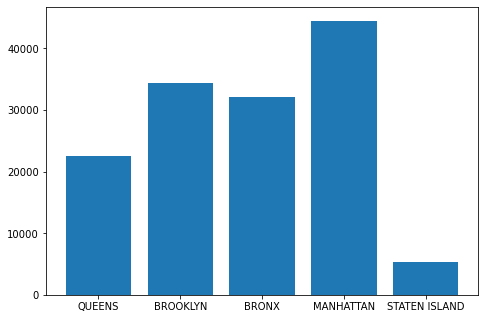

In [201]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
borough = summarygraph1['borough']
students = summarygraph1['date']
ax.bar(borough,students)
plt.show()